In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
sns.set()

In [2]:
# setting the number of cross validations used in the Model part 
nr_cv = 5

# switch for using log values for SalePrice and features     
use_logvals = 1    
# target used for correlation 
target = 'SalePrice_Log'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.4    
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1

In [3]:
strain_df = pd.read_csv("house_price_train.csv")
stest_df = pd.read_csv("houseprices_test.csv")

### 1) EDA

In [4]:
# Top 5 Rows of the Train data
strain_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
#Top 5 Rows of Test Data
stest_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,5.00e+00,8.00e+01,11622,1,None,Reg,3,2.00e+00,0,0,12,1,2,4,0,5,6,1961,1961,1,1,1.40e+01,1.40e+01,0,0.00e+00,3,3,1,3,3,1,3,4.68e+02,2,1.44e+02,2.70e+02,8.82e+02,1,3,1,0,896,0,0,896,0.00e+00,0.00e+00,1,0,2,1,3,5,7.00e+00,0,0,5,1.96e+03,1,1.00e+00,7.30e+02,3,3,2,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,9.00e+00,5
1,1462,20,2.00e+00,8.10e+01,14267,1,None,IR1,3,2.00e+00,1,0,12,2,2,4,0,6,6,1958,1958,3,1,1.50e+01,1.50e+01,2,1.08e+02,3,3,1,3,3,1,5,9.23e+02,1,0.00e+00,4.06e+02,1.33e+03,1,3,1,0,1329,0,0,1329,0.00e+00,0.00e+00,1,1,3,1,4,6,7.00e+00,0,0,5,1.96e+03,1,1.00e+00,3.12e+02,3,3,2,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,9.00e+00,5
2,1463,60,2.00e+00,7.40e+01,13830,1,None,IR1,3,2.00e+00,0,0,8,2,2,4,3,5,5,1997,1998,1,1,1.40e+01,1.40e+01,0,0.00e+00,3,3,2,4,3,1,6,7.91e+02,1,0.00e+00,1.37e+02,9.28e+02,1,4,1,0,928,701,0,1629,0.00e+00,0.00e+00,2,1,3,1,3,6,7.00e+00,1,3,5,2.00e+03,3,2.00e+00,4.82e+02,3,3,2,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,9.00e+00,5
3,1464,60,2.00e+00,7.80e+01,9978,1,None,IR1,3,2.00e+00,0,0,8,2,2,4,3,6,6,1998,1998,1,1,1.40e+01,1.40e+01,2,2.00e+01,3,3,2,3,3,1,6,6.02e+02,1,0.00e+00,3.24e+02,9.26e+02,1,5,1,0,926,678,0,1604,0.00e+00,0.00e+00,2,1,3,1,4,7,7.00e+00,1,4,5,2.00e+03,3,2.00e+00,4.70e+02,3,3,2,360,36,0,0,0,0,None,None,None,0,6,2010,9.00e+00,5
4,1465,120,2.00e+00,4.30e+01,5005,1,None,IR1,1,2.00e+00,0,0,22,2,2,1,0,8,5,1992,1992,1,1,6.00e+00,6.00e+00,0,0.00e+00,4,3,2,4,3,1,5,2.63e+02,1,0.00e+00,1.02e+03,1.28e+03,1,5,1,0,1280,0,0,1280,0.00e+00,0.00e+00,2,0,2,1,4,5,7.00e+00,0,0,5,1.99e+03,2,2.00e+00,5.06e+02,3,3,2,0,82,0,0,144,0,None,None,None,0,1,2010,9.00e+00,5


In [6]:
#Last 5 Rows of the Train Data
strain_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
# Last 5 Rows of the Test Data
stest_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [8]:
#Train Data Statistic Description
strain_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
# Test Data Statistic Description
stest_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [10]:
# Correalation Between All the Variables in Train Data
strain_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

* There Doesn't seem to be any correlation between variables but, two or more varaiables might have correlation with other variables.
* We will keep an eye out for those variables.

In [11]:
# Type Information of each variable in Train data
strain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

###### Numerical and Categorical Features

In [12]:
# Finding Number of Variables in in differnt types.
numerical_feats = strain_df.dtypes[strain_df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = strain_df.dtypes[strain_df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [13]:
print(strain_df[numerical_feats].columns)
print("*"*100)
print(strain_df[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation

In [14]:
# Table containing only Numerical Varaibles
strain_df[numerical_feats].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [15]:
# Table containing only Categorical Varaibles
strain_df[categorical_feats].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [16]:
# Value Counts of the Variables which I want.

print("Street \n\n", strain_df['Street'].value_counts())
print("\nAlley \n\n",strain_df['Alley'].value_counts())
print("\nBldgType \n\n",strain_df['BldgType'].value_counts())
print("\nNeighborhood \n\n",strain_df['Neighborhood'].value_counts())
print("\nHouseStyle \n\n",strain_df['HouseStyle'].value_counts())
print("\nUtilities \n\n",strain_df['Utilities'].value_counts())
print("\nHouseStyle \n\n",strain_df['HouseStyle'].value_counts() )          
print("\nFunctional \n\n",strain_df['Functional'].value_counts())          
print("\nPoolQC \n\n",strain_df['PoolQC'].value_counts()  )
print("\nFence \n\n",strain_df['Fence'].value_counts()  )

Street 

 Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley 

 Grvl    50
Pave    41
Name: Alley, dtype: int64

BldgType 

 1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

Neighborhood 

 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

HouseStyle 

 1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Utilities 

 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

HouseStyle 

 1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf

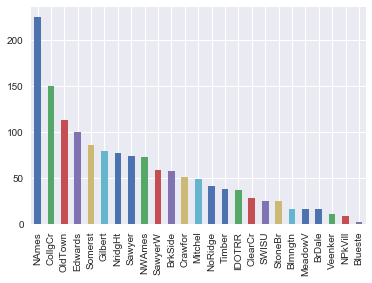

In [17]:
# Histogram plot of the Neighbourhood 
strain_df['Neighborhood'].value_counts().plot(kind='bar')
plt.show()

In [18]:
# Some Useful Functions
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])

def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

###### Distribution of Data: SalePrice

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: 1.882876
Kurtosis: 6.536282


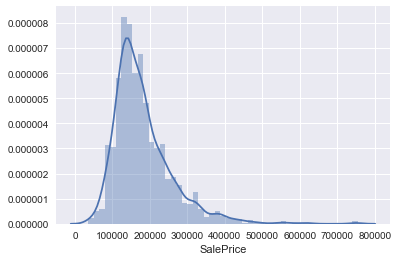

In [20]:
sns.distplot(strain_df['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % strain_df['SalePrice'].skew())
print("Kurtosis: %f" % strain_df['SalePrice'].kurt())

Note: 
    * As we see, the target variable SalePrice is not normally distributed.
    * This can reduce the performance of the ML models because they assume normal distribution
Therfore we make a log transformation, the resulting distribution looks much better.

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: 0.121347
Kurtosis: 0.809519


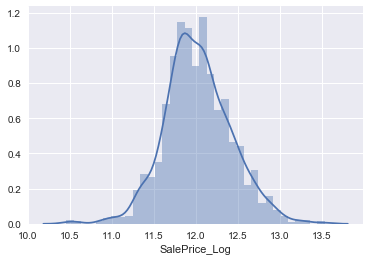

In [21]:
strain_df['SalePrice_Log'] = np.log1p(strain_df['SalePrice'])

sns.distplot(strain_df['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % strain_df['SalePrice_Log'].skew())
print("Kurtosis: %f" % strain_df['SalePrice_Log'].kurt())
# dropping old column
strain_df.drop('SalePrice', axis= 1, inplace=True)

Now, After Applying Log it becomes perfectly normal.

###### List of Varaibles with missing values (NA/NAn)

In [22]:
total = strain_df.isnull().sum().sort_values(ascending=False)
percent = (strain_df.isnull().sum()/strain_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


* But, if we consider the data and its description, Nan is not missing values since, For Nan inn Pool means That Building doesn't have any pool in it.
* So, Basically this is not a missing data and likewise for Fence, FireplaceQu etc.

In [23]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    strain_df[col].fillna('None',inplace=True)
    stest_df[col].fillna('None',inplace=True)

In [24]:
strain_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429220


In [25]:
stest_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal


AS you can see, all 'Nan' values got replaced by 'None'. 

###### Finding out "Real" missing values

In [26]:
total = strain_df.isnull().sum().sort_values(ascending=False)
percent = (strain_df.isnull().sum()/strain_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice_Log,0,0.000000
ExterCond,0,0.000000


###### Dealing with Numerical Missing Data

In [27]:
# fillna with mean or mode for the remaining values
strain_df.fillna(strain_df.mean(), inplace=True)
stest_df.fillna(stest_df.mean(), inplace=True)
strain_df.fillna(strain_df.mode(), inplace=True)
stest_df.fillna(stest_df.mode(), inplace=True)

In [28]:
strain_df.isnull().sum().sum()

0

Hence No Missing Values here now, How about Test Data ?

In [29]:
stest_df.isnull().sum().sum()

0

Hence, No Missing Values in either Test or Train Data.

###### Normalization: Log Transform

Like the target variable: 
    * some of the feature values are not normally distributed 
    * it is therefore better to use log values in train and test. 
Checking for skewness and kurtosis:

In [30]:
for col in numerical_feats:
    print(col)
    print("Skewness: %f" % strain_df[col].skew())
    print("Kurtosis: %f" % strain_df[col].kurt())
    print("*"*50)

Id
Skewness: 0.000000
Kurtosis: -1.200000
**************************************************
MSSubClass
Skewness: 1.407657
Kurtosis: 1.580188
**************************************************
LotFrontage
Skewness: 2.384950
Kurtosis: 21.848165
**************************************************
LotArea
Skewness: 12.207688
Kurtosis: 203.243271
**************************************************
OverallQual
Skewness: 0.216944
Kurtosis: 0.096293
**************************************************
OverallCond
Skewness: 0.693067
Kurtosis: 1.106413
**************************************************
YearBuilt
Skewness: -0.613461
Kurtosis: -0.439552
**************************************************
YearRemodAdd
Skewness: -0.503562
Kurtosis: -1.272245
**************************************************
MasVnrArea
Skewness: 2.676412
Kurtosis: 10.154316
**************************************************
BsmtFinSF1
Skewness: 1.685503
Kurtosis: 11.118236
***********************************************

KeyError: 'SalePrice'

Note: LotArea, 3SsnPorch, PoolArea, MiscVal have Huge Kurtosis

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: 1.366560
Kurtosis: 4.895121


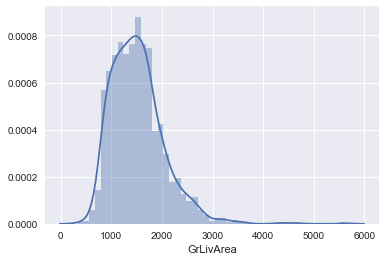

In [31]:
sns.distplot(strain_df['GrLivArea']);
#skewness and kurtosis
print("Skewness: %f" % strain_df['GrLivArea'].skew())
print("Kurtosis: %f" % strain_df['GrLivArea'].kurt())

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: 12.207688
Kurtosis: 203.243271


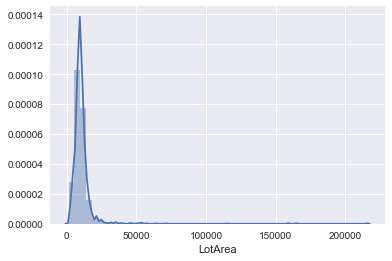

In [32]:
sns.distplot(strain_df['LotArea']);
#skewness and kurtosis
print("Skewness: %f" % strain_df['LotArea'].skew())
print("Kurtosis: %f" % strain_df['LotArea'].kurt())

###### Finding Realtion to Feature of 'SalePrice_Log'

In [34]:
strain_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429220


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


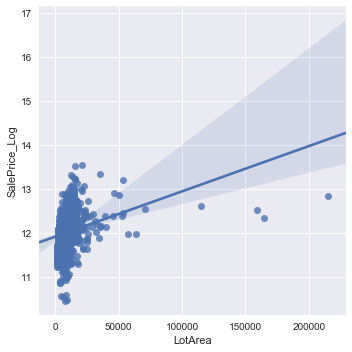

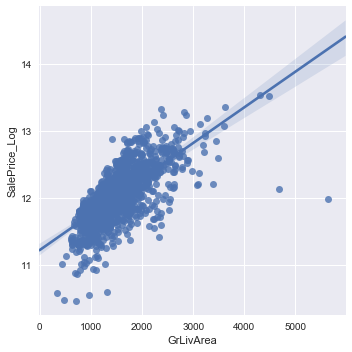

In [35]:
 import seaborn as sns
sns.lmplot(x ="LotArea" ,
           y = "SalePrice_Log", 
           data = strain_df)

import seaborn as sns
sns.lmplot(x ="GrLivArea" ,
           y = "SalePrice_Log", 
           data = strain_df)


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


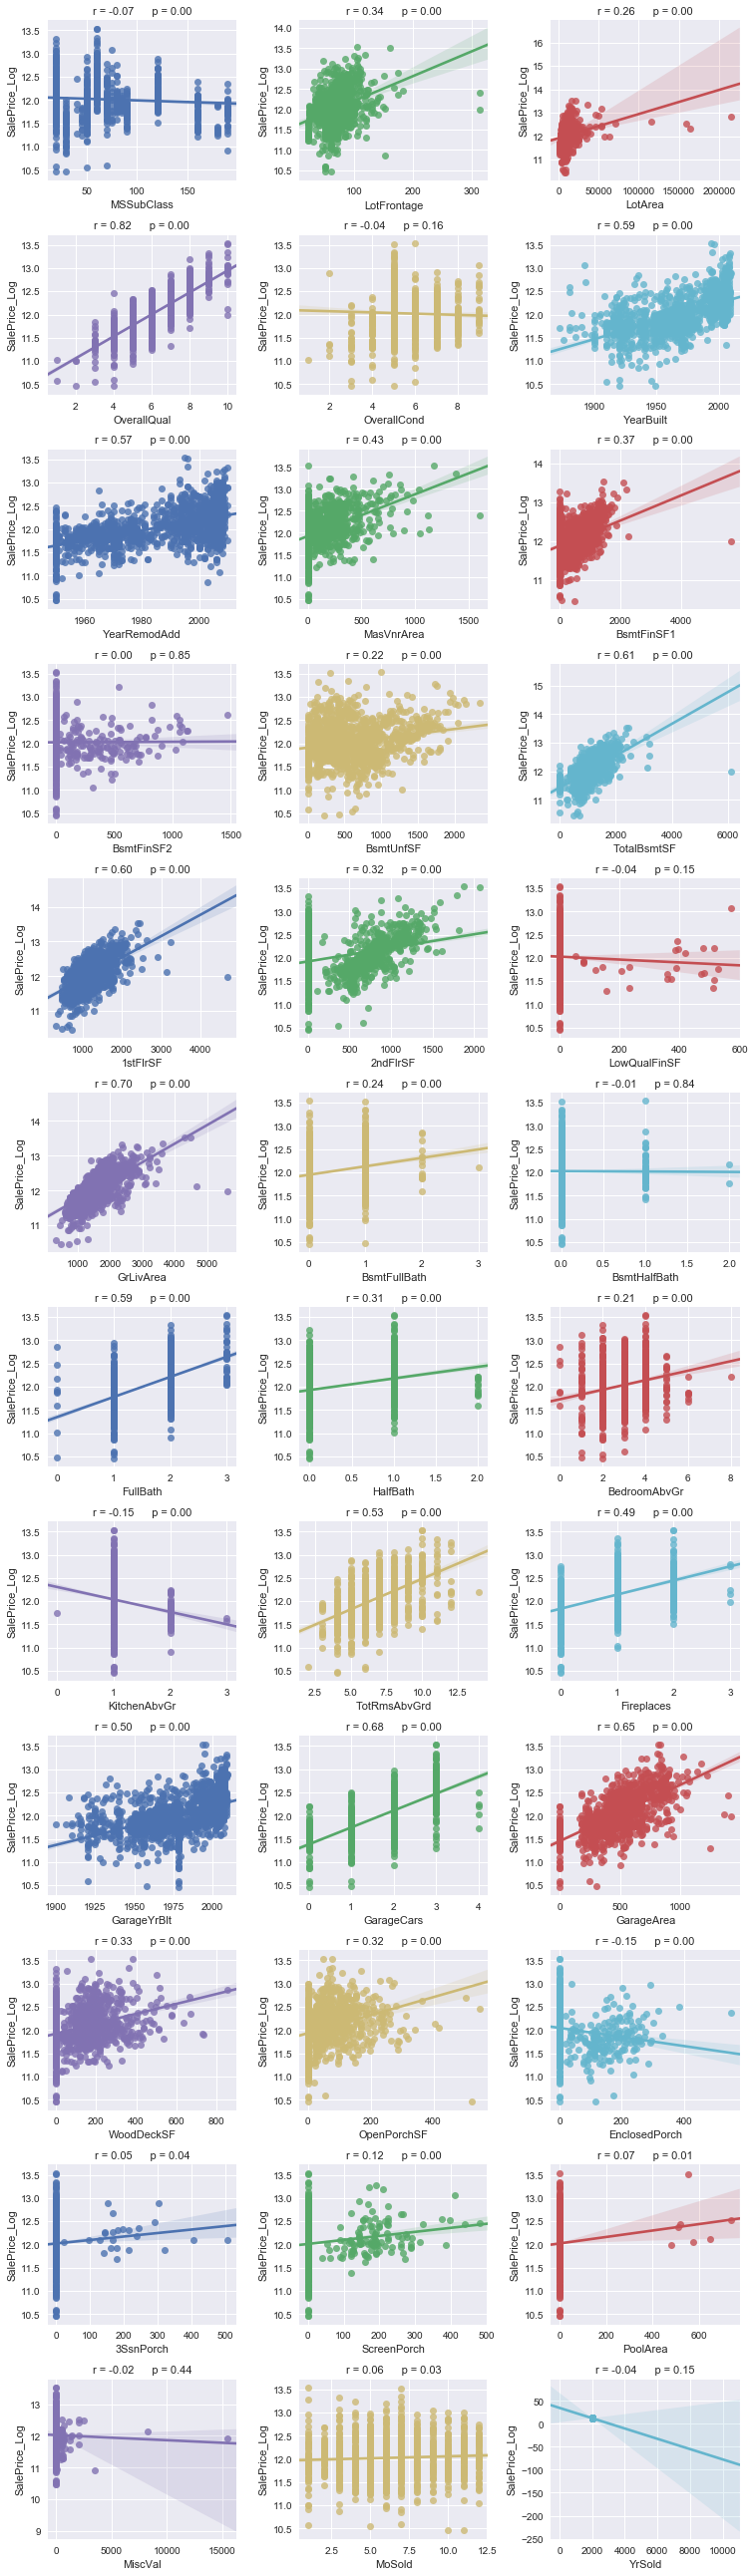

In [36]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(strain_df[li_plot_num_feats[i]], strain_df[target], ax = axs[r][c])
            stp = stats.pearsonr(strain_df[li_plot_num_feats[i]], strain_df[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

##### Conclusion from EDA on numerical columns:

* We see that for some features like 'OverallQual' there is a strong linear correlation (0.79) to the target.
* For other features like 'MSSubClass' the correlation is very weak.

* With the default threshold for min_val_corr = 0.4, these features such as 'Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold' lies below the threshold.

* We also see that the entries for some of the numerical columns are in fact categorical values. For example, the numbers for 'OverallQual' and 'MSSubClass' represent a certain group for that feature 

###### Correlation Matrix (Alternative)

In [37]:
corr = strain_df.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

In [38]:
nr_feats = len(cols_abv_corr_limit)

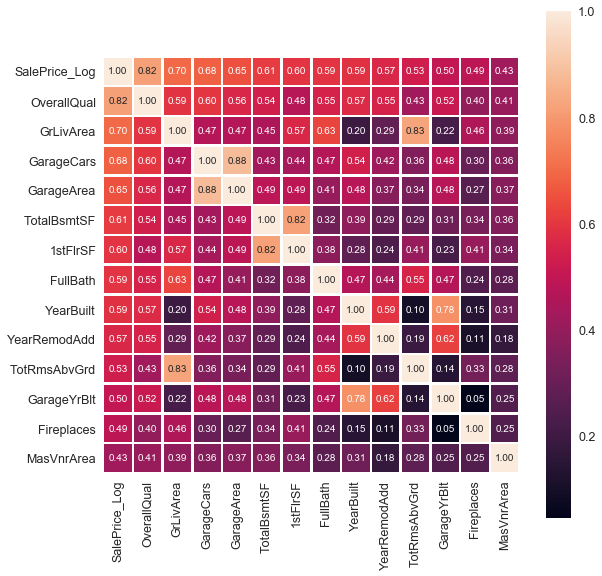

In [39]:
plot_corr_matrix(strain_df, nr_feats, target)

### 2) Feature engineering

Garbage Features:

In [40]:
strain_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429220


In [51]:
train_data = strain_df

In [59]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Electrical,1,0.000685
SalePrice_Log,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000


Here, we missed a Null value ('NA'), cheeky guy was hiding, so we'll replace it with None as per the Data Description goes
AS, column name is electrical so, it is pssiblible that building doesn't have any electrical system present.

In [85]:
train_data.fillna('None', inplace=True)
#stest_df.fillna(stest_df.mean(), inplace=True)

In [86]:
train_data['Electrical'].isnull().sum()

0

In [52]:
# Encode ordinal data
train_data['LotShape'] = train_data['LotShape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
train_data['LandContour'] = train_data['LandContour'].map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})
train_data['Utilities'] = train_data['Utilities'].map({'NoSeWa':0,'NoSeWa':1,'AllPub':2})
train_data['BldgType'] = train_data['BldgType'].map({'Twnhs':0,'TwnhsE':1,'Duplex':2,'2fmCon':3,'1Fam':4})
train_data['HouseStyle'] = train_data['HouseStyle'].map({'1Story':0,'1.5Fin':1,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,'SLvl':7})
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train_data['LandSlope'] = train_data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
train_data['Street'] = train_data['Street'].map({'Grvl':0,'Pave':1})
train_data['MasVnrType'] = train_data['MasVnrType'].map({'None':0,'BrkCmn':1,'BrkFace':2,'CBlock':3,'Stone':4})
train_data['CentralAir'] = train_data['CentralAir'].map({'N':0,'Y':1})
train_data['GarageFinish'] = train_data['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
train_data['PavedDrive'] = train_data['PavedDrive'].map({'N':0,'P':1,'Y':2})
train_data['BsmtExposure'] = train_data['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
train_data['ExterQual'] = train_data['ExterQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['ExterCond'] = train_data['ExterCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['BsmtCond'] = train_data['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['BsmtQual'] = train_data['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['HeatingQC'] = train_data['HeatingQC'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['KitchenQual'] = train_data['KitchenQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['FireplaceQu'] = train_data['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['GarageQual'] = train_data['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_data['GarageCond'] = train_data['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

# Encode Categorical Variables
train_data['Foundation'] = train_data['Foundation'].map({'BrkTil':0,'CBlock':1,'PConc':2,'Slab':3,'Stone':4,'Wood':5})
train_data['Heating'] = train_data['Heating'].map({'Floor':0,'GasA':1,'GasW':2,'Grav':3,'OthW':4,'Wall':5})
train_data['Electrical'] = train_data['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4})
train_data['Functional'] = train_data['Functional'].map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})
train_data['GarageType'] = train_data['GarageType'].map({'None':0,'Detchd':1,'CarPort':2,'BuiltIn':3,'Basment':4,'Attchd':5,'2Types':6})
train_data['SaleType'] = train_data['SaleType'].map({'Oth':0,'ConLD':1,'ConLI':2,'ConLw':3,'Con':4,'COD':5,'New':6,'VWD':7,'CWD':8,'WD':9})
train_data['SaleCondition'] = train_data['SaleCondition'].map({'Partial':0,'Family':1,'Alloca':2,'AdjLand':3,'Abnorml':4,'Normal':5})
train_data['MSZoning'] = train_data['MSZoning'].map({'A':0,'FV':1,'RL':2,'RP':3,'RM':4,'RH':5,'C (all)':6,'I':7})
train_data['LotConfig'] = train_data['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})
train_data['Neighborhood'] = train_data['Neighborhood'].map({'Blmngtn':0,'Blueste':1,'BrDale':2,'BrkSide':3, 'ClearCr':4,'CollgCr':5,'Crawfor':6,'Edwards':7,'Gilbert':8,
                                                             'IDOTRR':9,'MeadowV':10,'Mitchel':11, 'NAmes':12,'NoRidge':13,'NPkVill':14,'NridgHt':15, 'NWAmes':16,
                                                             'OldTown':17,'SWISU':18,'Sawyer':19, 'SawyerW':20,'Somerst':21,'StoneBr':22,'Timber':23,'Veenker':24})
train_data['Condition1'] = train_data['Condition1'].map({'Artery':0,'Feedr':1,'Norm':2,'RRNn':3, 'RRAn':4,'PosN':5,'PosA':6,'RRNe':7,'RRAe':8})
train_data['Condition2'] = train_data['Condition2'].map({'Artery':0,'Feedr':1,'Norm':2,'RRNn':3, 'RRAn':4,'PosN':5,'PosA':6,'RRNe':7,'RRAe':8})
train_data['RoofStyle'] = train_data['RoofStyle'].map({'Flat':0,'Gable':1,'Gambrel':2,'Hip':3,'Mansard':4,'Shed':5})
train_data['RoofMatl'] = train_data['RoofMatl'].map({'ClyTile':0,'CompShg':1,'Membran':2,'Metal':3,'Roll':4,'Tar&Grv':5,'WdShake':6,'WdShngl':7})
train_data['Exterior1st'] = train_data['Exterior1st'].map({'AsbShng':0,'AsphShn':1,'BrkComm':2,'BrkFace':3,'CBlock':4,'CemntBd':5,'HdBoard':6,'ImStucc':7,'MetalSd':8,
                                                           'Other':9,'Plywood':10,'PreCast':11,'Stone':12,'Stucco':13,'VinylSd':14,'Wd Sdng':15,'WdShing':16})
train_data['Exterior2nd'] = train_data['Exterior2nd'].map({'AsbShng':0,'AsphShn':1,'Brk Cmn':2,'BrkFace':3,'CBlock':4,'CmentBd':5,'HdBoard':6,'ImStucc':7,'MetalSd':8,
                                                           'Other':9,'Plywood':10,'PreCast':11,'Stone':12,'Stucco':13,'VinylSd':14,'Wd Sdng':15,'Wd Shng':16})

###### Just Checking few things such that some cheeky stuff should not go unnoticed and trying to find anything unusual

In [69]:
cv = pd.read_csv("house_price_train.csv")
train_data['SalePrice'] = cv['SalePrice']

In [70]:
# Lasso Regression

# Split
# Create matrix of all x features
X = train_data.drop(['SalePrice','Alley','PoolQC','Fence','MiscFeature'], axis = 1)

# Create array of target variable
y = train_data['SalePrice']

# Split training data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20,random_state = 101)

# Fit
# Import model
from sklearn.linear_model import Lasso

# Instantiate object
lasso = Lasso()

# Fit model to training data
lasso = lasso.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso.predict(X_test)

# Score It
from sklearn import metrics
print('Linear Regression Performance')
print('MAE',metrics.mean_absolute_error(y_test, y_pred_lasso))
print('MSE',metrics.mean_squared_error(y_test, y_pred_lasso))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_lasso))

# Lasso Coefficients
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cdf = pd.DataFrame(data = lasso.coef_,index = X_train.columns, columns = ['Lasso Coefficients'])
# **RANDOM FOREST**
cdf.sort_values(by = 'Lasso Coefficients', ascending = False)

Linear Regression Performance
MAE 13874.850809652815
MSE 660876162.8108938
RMSE 25707.511797350086
R^2 = 0.889005344089255


,Lasso Coefficients
SalePrice_Log,177038.04
ExterQual,6360.19
Utilities,4852.99
MSZoning,3896.80
KitchenQual,3094.08
BsmtExposure,2723.39
LandContour,1818.14
RoofMatl,1792.97
BsmtQual,1782.91
TotRmsAbvGrd,1451.24


###### Feature Selector and Top 20% of Features

In [ ]:
# Select top 20% of features

# Create matrix of x features
X = train_data.drop(['SalePrice','Alley','PoolQC','Fence','MiscFeature'], axis = 1)

# Create array of target variable y
y =train_data['SalePrice']

# Feature Selector
# Import
from sklearn.feature_selection import SelectPercentile, f_regression

# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=20)

# Fit and transform
x_best = selector_f.fit_transform(X, y)

##### Pareto Approach

In [73]:
support = np.asarray(selector_f.get_support())

# Supress displaying long numbers in scientific notation
#pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Enable scientific notation
pd.set_option('display.float_format', '{:.2e}'.format)

# Column names of top 20%
features = np.asarray(X.columns.values)
features_with_support = features[support]
# print('Top 20% of the best, associated features to SalePrice\n',columns_with_support)
# print('Number of Features:', len(columns_with_support))

#f-scores of top 20%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 20%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 20%
top20 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)
# top20.index.name = 'Feature'
print('Top 20% best associated features to SalePrice\nNumber of features:',len(features_with_support))
print(top20.sort_values(by = 'p-value', ascending = 'True'))

#Print All Selector_f.scores_
# for n,s in zip(train_data.columns,Selector_f.scores_):
#      print('F-score: %3.2ft for feature %s ' % (s,n))

# Dataframe of all f-scores
# fscores = pd.DataFrame(selector_f.scores_,X.columns,['F-score'])
# fscores.sort_values(by = 'F-score', ascending = False)

# Dataframe of all p-values
# pscores = pd.DataFrame(selector_f.pvalues_,X.columns, ['P_Value'])
# pscores.sort_values(by = 'P_Value', ascending = True)

Top 20% best associated features to SalePrice
Number of features: 16
               F-score   p-value
SalePrice_Log 1.30e+04  0.00e+00
OverallQual   2.44e+03 2.19e-313
GrLivArea     1.47e+03 4.52e-223
ExterQual     1.27e+03 7.33e-201
KitchenQual   1.12e+03 5.05e-183
GarageCars    1.01e+03 2.50e-169
GarageArea    9.27e+02 5.27e-158
TotalBsmtSF   8.80e+02 9.48e-152
1stFlrSF      8.46e+02 5.39e-147
BsmtQual      7.59e+02 6.51e-135
FullBath      6.68e+02 1.24e-121
GarageFinish  6.30e+02 7.92e-116
TotRmsAbvGrd  5.81e+02 2.77e-108
YearBuilt     5.49e+02 2.99e-103
FireplaceQu   5.42e+02 3.93e-102
YearRemodAdd  5.05e+02  3.16e-96


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


##### Note:The top 20% of features are all statistically significant as their p-values are far under .05. This further confirms that these features will be good to use in predicting SalePrice

In [75]:
best_feat = train_data[features_with_support]
# Remove redundant features
best_feat = best_feat.drop(['TotRmsAbvGrd','GarageArea'], axis = 1)
best_feat.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'SalePrice_Log'],
      dtype='object')

###  3)create a model basis train data

Note: Based on models I worked on, as such the case of Data, I have habit of applying the Random Forest Regression as It gave me Best results in previous instances and of course I'll go with the other models if time permits.  

In [76]:
X_best = train_data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 
               '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 
               'GarageFinish', 'GarageCars', 'GarageArea']]

# Create array of target variable
y = train_data['SalePrice']

# Split training data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_best,y, test_size = .20,random_state = 101)

# Fit
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators = 300, random_state = 0) 
rforest.fit(X_best,y)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
from sklearn import metrics
print('Random Forest Regression Performance')
print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Random Forest Regression Performance
MAE 7154.820922836488
MSE 136187116.3766139
RMSE 11669.923580581575
R^2 = 0.9771234866037397


## 5) predict test data – explain why your model is the best. 

In [77]:
stest_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,8.00e+01,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00e+00,TA,TA,CBlock,TA,TA,No,Rec,4.68e+02,LwQ,1.44e+02,2.70e+02,8.82e+02,GasA,TA,Y,SBrkr,896,0,0,896,0.00e+00,0.00e+00,1,0,2,1,TA,5,Typ,0,None,Attchd,1.96e+03,Unf,1.00e+00,7.30e+02,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,8.10e+01,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,1.08e+02,TA,TA,CBlock,TA,TA,No,ALQ,9.23e+02,Unf,0.00e+00,4.06e+02,1.33e+03,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00e+00,0.00e+00,1,1,3,1,Gd,6,Typ,0,None,Attchd,1.96e+03,Unf,1.00e+00,3.12e+02,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,7.40e+01,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.00e+00,TA,TA,PConc,Gd,TA,No,GLQ,7.91e+02,Unf,0.00e+00,1.37e+02,9.28e+02,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00e+00,0.00e+00,2,1,3,1,TA,6,Typ,1,TA,Attchd,2.00e+03,Fin,2.00e+00,4.82e+02,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,7.80e+01,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,2.00e+01,TA,TA,PConc,TA,TA,No,GLQ,6.02e+02,Unf,0.00e+00,3.24e+02,9.26e+02,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00e+00,0.00e+00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2.00e+03,Fin,2.00e+00,4.70e+02,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,4.30e+01,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.00e+00,Gd,TA,PConc,Gd,TA,No,ALQ,2.63e+02,Unf,0.00e+00,1.02e+03,1.28e+03,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00e+00,0.00e+00,2,0,2,1,Gd,5,Typ,0,None,Attchd,1.99e+03,RFn,2.00e+00,5.06e+02,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal


In [78]:
test_data = stest_df

In [79]:
test_data['LandContour'] = test_data['LandContour'].map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})
test_data['Utilities'] = test_data['Utilities'].map({'NoSeWa':0,'NoSeWa':1,'AllPub':2})
test_data['BldgType'] = test_data['BldgType'].map({'Twnhs':0,'TwnhsE':1,'Duplex':2,'2fmCon':3,'1Fam':4})
test_data['HouseStyle'] = test_data['HouseStyle'].map({'1Story':0,'1.5Fin':1,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,'SLvl':7})
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
test_data['LandSlope'] = test_data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
test_data['Street'] = test_data['Street'].map({'Grvl':0,'Pave':1})
test_data['MasVnrType'] = test_data['MasVnrType'].map({'None':0,'BrkCmn':1,'BrkFace':2,'CBlock':3,'Stone':4})
test_data['CentralAir'] = test_data['CentralAir'].map({'N':0,'Y':1})
test_data['GarageFinish'] = test_data['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
test_data['PavedDrive'] = test_data['PavedDrive'].map({'N':0,'P':1,'Y':2})
test_data['BsmtExposure'] = test_data['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
test_data['ExterQual'] = test_data['ExterQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['ExterCond'] = test_data['ExterCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['BsmtCond'] = test_data['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['BsmtQual'] = test_data['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['HeatingQC'] = test_data['HeatingQC'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['KitchenQual'] = test_data['KitchenQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['FireplaceQu'] = test_data['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['GarageQual'] = test_data['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['GarageCond'] = test_data['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

# Encode Categorical Variables
test_data['Foundation'] = test_data['Foundation'].map({'BrkTil':0,'CBlock':1,'PConc':2,'Slab':3,'Stone':4,'Wood':5})
test_data['Heating'] = test_data['Heating'].map({'Floor':0,'GasA':1,'GasW':2,'Grav':3,'OthW':4,'Wall':5})
test_data['Electrical'] = test_data['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4})
test_data['Functional'] = test_data['Functional'].map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})
test_data['GarageType'] = test_data['GarageType'].map({'None':0,'Detchd':1,'CarPort':2,'BuiltIn':3,'Basment':4,'Attchd':5,'2Types':6})
test_data['SaleType'] = test_data['SaleType'].map({'Oth':0,'ConLD':1,'ConLI':2,'ConLw':3,'Con':4,'COD':5,'New':6,'VWD':7,'CWD':8,'WD':9})
test_data['SaleCondition'] = test_data['SaleCondition'].map({'Partial':0,'Family':1,'Alloca':2,'AdjLand':3,'Abnorml':4,'Normal':5})
test_data['MSZoning'] = test_data['MSZoning'].map({'A':0,'FV':1,'RL':2,'RP':3,'RM':4,'RH':5,'C (all)':6,'I':7})
test_data['LotConfig'] = test_data['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})
test_data['Neighborhood'] = test_data['Neighborhood'].map({'Blmngtn':0,'Blueste':1,'BrDale':2,'BrkSide':3, 'ClearCr':4,'CollgCr':5,'Crawfor':6,'Edwards':7,'Gilbert':8,
                                                             'IDOTRR':9,'MeadowV':10,'Mitchel':11, 'NAmes':12,'NoRidge':13,'NPkVill':14,'NridgHt':15, 'NWAmes':16,
                                                             'OldTown':17,'SWISU':18,'Sawyer':19, 'SawyerW':20,'Somerst':21,'StoneBr':22,'Timber':23,'Veenker':24})
test_data['Condition1'] = test_data['Condition1'].map({'Artery':0,'Feedr':1,'Norm':2,'RRNn':3, 'RRAn':4,'PosN':5,'PosA':6,'RRNe':7,'RRAe':8})
test_data['Condition2'] = test_data['Condition2'].map({'Artery':0,'Feedr':1,'Norm':2,'RRNn':3, 'RRAn':4,'PosN':5,'PosA':6,'RRNe':7,'RRAe':8})
test_data['RoofStyle'] = test_data['RoofStyle'].map({'Flat':0,'Gable':1,'Gambrel':2,'Hip':3,'Mansard':4,'Shed':5})
test_data['RoofMatl'] = test_data['RoofMatl'].map({'ClyTile':0,'CompShg':1,'Membran':2,'Metal':3,'Roll':4,'Tar&Grv':5,'WdShake':6,'WdShngl':7})
test_data['Exterior1st'] = test_data['Exterior1st'].map({'AsbShng':0,'AsphShn':1,'BrkComm':2,'BrkFace':3,'CBlock':4,'CemntBd':5,'HdBoard':6,'ImStucc':7,'MetalSd':8,
                                                           'Other':9,'Plywood':10,'PreCast':11,'Stone':12,'Stucco':13,'VinylSd':14,'Wd Sdng':15,'WdShing':16})
test_data['Exterior2nd'] = test_data['Exterior2nd'].map({'AsbShng':0,'AsphShn':1,'Brk Cmn':2,'BrkFace':3,'CBlock':4,'CmentBd':5,'HdBoard':6,'ImStucc':7,'MetalSd':8,
                                                           'Other':9,'Plywood':10,'PreCast':11,'Stone':12,'Stucco':13,'VinylSd':14,'Wd Sdng':15,'Wd Shng':16})

Now so,
* Our test data is 'model ready'
* We will apply a Random Forest model using the best, most associated features to SalePrice that were identified in the training data previously: 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea'

In [80]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,5.00e+00,8.00e+01,11622,1,None,Reg,3,2.00e+00,0,0,12,1,2,4,0,5,6,1961,1961,1,1,1.40e+01,1.40e+01,0,0.00e+00,3,3,1,3,3,1,3,4.68e+02,2,1.44e+02,2.70e+02,8.82e+02,1,3,1,0,896,0,0,896,0.00e+00,0.00e+00,1,0,2,1,3,5,7.00e+00,0,0,5,1.96e+03,1,1.00e+00,7.30e+02,3,3,2,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,9.00e+00,5
1,1462,20,2.00e+00,8.10e+01,14267,1,None,IR1,3,2.00e+00,1,0,12,2,2,4,0,6,6,1958,1958,3,1,1.50e+01,1.50e+01,2,1.08e+02,3,3,1,3,3,1,5,9.23e+02,1,0.00e+00,4.06e+02,1.33e+03,1,3,1,0,1329,0,0,1329,0.00e+00,0.00e+00,1,1,3,1,4,6,7.00e+00,0,0,5,1.96e+03,1,1.00e+00,3.12e+02,3,3,2,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,9.00e+00,5
2,1463,60,2.00e+00,7.40e+01,13830,1,None,IR1,3,2.00e+00,0,0,8,2,2,4,3,5,5,1997,1998,1,1,1.40e+01,1.40e+01,0,0.00e+00,3,3,2,4,3,1,6,7.91e+02,1,0.00e+00,1.37e+02,9.28e+02,1,4,1,0,928,701,0,1629,0.00e+00,0.00e+00,2,1,3,1,3,6,7.00e+00,1,3,5,2.00e+03,3,2.00e+00,4.82e+02,3,3,2,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,9.00e+00,5
3,1464,60,2.00e+00,7.80e+01,9978,1,None,IR1,3,2.00e+00,0,0,8,2,2,4,3,6,6,1998,1998,1,1,1.40e+01,1.40e+01,2,2.00e+01,3,3,2,3,3,1,6,6.02e+02,1,0.00e+00,3.24e+02,9.26e+02,1,5,1,0,926,678,0,1604,0.00e+00,0.00e+00,2,1,3,1,4,7,7.00e+00,1,4,5,2.00e+03,3,2.00e+00,4.70e+02,3,3,2,360,36,0,0,0,0,None,None,None,0,6,2010,9.00e+00,5
4,1465,120,2.00e+00,4.30e+01,5005,1,None,IR1,1,2.00e+00,0,0,22,2,2,1,0,8,5,1992,1992,1,1,6.00e+00,6.00e+00,0,0.00e+00,4,3,2,4,3,1,5,2.63e+02,1,0.00e+00,1.02e+03,1.28e+03,1,5,1,0,1280,0,0,1280,0.00e+00,0.00e+00,2,0,2,1,4,5,7.00e+00,0,0,5,1.99e+03,2,2.00e+00,5.06e+02,3,3,2,0,82,0,0,144,0,None,None,None,0,1,2010,9.00e+00,5


##### Random Forest on Test Data:

In [81]:
# Split
# Create matrix of x features for training data
X_train2 = train_data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 
               '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 
               'GarageFinish', 'GarageCars', 'GarageArea']]

# Create target variable array for training data
y_train2 = train_data['SalePrice']

# Create matrix of x features for test data
X_test2 = test_data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 
               '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 
               'GarageFinish', 'GarageCars', 'GarageArea']]

# There is no target variable array for test data

# Confirm data shapes
print('Data Shapes')
print('x_train shape', X_train2.shape)
print('y_train shape',y_train2.shape)
print('x_test shape', X_test2.shape)

# Fit Random Forest to training data
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators = 300, random_state = 0) 
rforest.fit(X_train2,y_train2)

# Predict using test data
y_pred_rforest2 = rforest.predict(X_test2)

Data Shapes
x_train shape (1460, 15)
y_train shape (1460,)
x_test shape (1459, 15)


### Exporting to Csv File

In [82]:
Predicted_data = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": y_pred_rforest2
    })
Predicted_data.to_csv('HousingPredict.csv', index=False)

### Conclusion:

* We have taken the top 20% of features are all statistically significant as their p-values are far under .05. 
* So, This confirms that these features will be good to use in predicting SalePrice.
* So By Using the Random Forest Regressor, we'll be able to predict the most of values successfully.
* Our R square Score confirms our model goodness with affordable RMSE AND MSE scores.
* The model is made from top 20% extracted features which have relationship with the target variable 'SalePrice', so model performance is fated to increase.
* Model has also converted numerical values from categorical values for gradual increase oin performance and varaibles with negligible relationship with the target varaible are dropped in the model inputs itself and R square score coonfirms my intentions.

    